In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total = pd.read_csv('./data/innovation/df_gu_total.csv')

In [126]:
total.head()

,DATE,GU_NM,레저_USE_AMT,문화취미_USE_AMT,가구_USE_AMT,전기_USE_AMT,주방_USE_AMT,연료_USE_AMT,광학_USE_AMT,가전_USE_AMT,...,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT
0,20180401,노원구,38739.0,40507.0,21890.0,NaN,2885.0,364300.0,13812.0,145154.0,...,244945.230841,374931.325650,24240.817354,46787.781756,5417.837281,8331.826061,6619.375782,68.328472,35.256944,515
1,20180401,종로구,18134.0,70755.0,NaN,48.0,1974.0,21652.0,6411.0,5655.0,...,229183.959785,352516.787803,33958.016953,68124.213224,10029.373692,15065.768480,4995.495591,84.070139,43.877083,515
2,20180402,노원구,24158.0,24220.0,3449.0,2889.0,6052.0,12114002.0,4620.0,153582.0,...,214107.366656,364347.033954,27224.989569,38527.090847,5044.221908,9985.350939,8876.293641,72.005556,29.909028,888
3,20180402,종로구,13887.0,38318.0,NaN,2356.0,7557.0,29862.0,5267.0,41640.0,...,221498.911270,426442.127119,39956.697134,66428.244772,9316.849827,15306.177645,3638.706671,72.274306,30.051389,888
4,20180403,노원구,26960.0,18091.0,9782.0,3999.0,33470.0,369762.0,2961.0,88636.0,...,212932.574189,351559.668716,20892.360423,36532.561026,6065.621221,7723.334973,4392.682208,72.838194,24.295833,856


In [127]:
shinhanIdx = ['leisure', 'culture', 'fuel', 'circul', 'cloth', 'sinbyeon', 'book', 'car repair', 'hospital', 'Public Health', 'food', 'drink', 'repair service']

In [128]:
total.columns

Index(['DATE', 'GU_NM', '레저_USE_AMT', '문화취미_USE_AMT', '가구_USE_AMT',
       '전기_USE_AMT', '주방_USE_AMT', '연료_USE_AMT', '광학_USE_AMT', '가전_USE_AMT',
       '유통업_USE_AMT', '의복_USE_AMT', '직물_USE_AMT', '신변잡화_USE_AMT',
       '서적문구_USE_AMT', '사무통신_USE_AMT', '자동차판매_USE_AMT', '자동차정비_USE_AMT',
       '의료기관_USE_AMT', '보건위생_USE_AMT', '요식업소_USE_AMT', '음료식품_USE_AMT',
       '수리서비스_USE_AMT', 'TMST_00', 'TMST_01', 'TMST_02', 'TMST_03', 'TMST_04',
       'TMST_05', 'TMST_06', 'TMST_07', 'TMST_08', 'TMST_09', 'TMST_10',
       'TMST_11', 'TMST_12', 'TMST_13', 'TMST_14', 'TMST_15', 'TMST_16',
       'TMST_17', 'TMST_18', 'TMST_19', 'TMST_20', 'TMST_21', 'TMST_22',
       'TMST_23', 'LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P',
       'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25',
       'CONTENT'],
      dtype='object')

In [129]:
total.drop(['가구_USE_AMT', '전기_USE_AMT', '주방_USE_AMT', '광학_USE_AMT', '가전_USE_AMT', 
            '직물_USE_AMT', '사무통신_USE_AMT', '자동차판매_USE_AMT'], 
           axis = 1, inplace = True)

In [130]:
Time = []
for i in range(24) :
    Time.append(str(i) + 'h')

In [132]:
total.columns = ['DATE', 'GU_NM'] + shinhanIdx + Time + ['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P',
       'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'pm10',
       'pm25', 'CONTENT']

In [133]:
total_nowon = total.iloc[np.where(total.loc[:, 'GU_NM'] == "노원구")]
total_jongro = total.iloc[np.where(total.loc[:, 'GU_NM'] == "종로구")]

In [134]:
dateIdx = pd.date_range('2018/04/01', '2019/03/31')

total_nowon.index = dateIdx
total_jongro.index = dateIdx

total_nowon.drop(['DATE', 'GU_NM'], axis = 1, inplace = True)
total_jongro.drop(['DATE', 'GU_NM'], axis = 1, inplace = True)

/root/miniconda3/envs/Big_Contest/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [135]:
dateIdx_NB = set(dateIdx) - set(pd.date_range('2018-04-01', '2019-03-31', freq = 'B'))

total_nowon_B = pd.DataFrame(total_nowon, index = pd.date_range('2018-04-01', '2019-03-31', freq = 'B'))
total_jongro_B = pd.DataFrame(total_jongro, index = pd.date_range('2018-04-01', '2019-03-31', freq = 'B'))

total_nowon_NB = pd.DataFrame(total_nowon, index = dateIdx_NB)
total_jongro_NB = pd.DataFrame(total_jongro, index = dateIdx_NB)

In [136]:
corr_nowon = total_nowon.corr()
corr_jongro = total_jongro.corr()

corr_nowon_B = total_nowon_B.corr()
corr_jongro_B = total_jongro_B.corr()

corr_nowon_NB = total_nowon_NB.corr()
corr_jongro_NB = total_jongro_NB.corr()

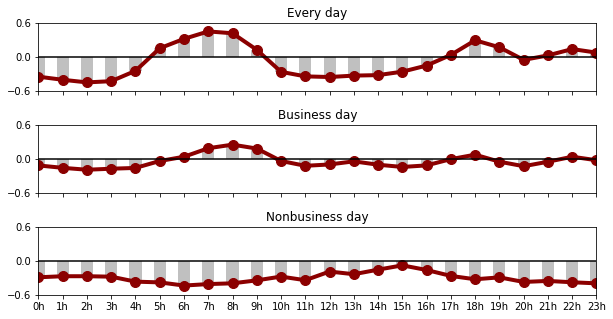

In [144]:
fig1, axes = plt.subplots(3, 1, sharex=True)

corr_nowon['CONTENT']['0h':'23h'].plot(kind = 'bar', figsize = (10, 5), ax = axes[0], title = 'Every day', 
                                                ylim = [-0.6,0.6], color = 'silver', yticks = [-0.6, 0.0, 0.6])
corr_nowon['CONTENT']['0h':'23h'].plot(ylim = [-0.6,0.6], ax = axes[0], color = 'darkred', marker = 'o', 
                                                linewidth = 4, markersize = 10, yticks = [-0.6, 0.0, 0.6])
axes[0].axhline(0, color='k')
corr_nowon_B['CONTENT']['0h':'23h'].plot(kind = 'bar', figsize = (10, 5), ax = axes[1], title = 'Business day', 
                                                  ylim = [-0.6,0.6], color = 'silver', yticks = [-0.6, 0.0, 0.6])
corr_nowon_B['CONTENT']['0h':'23h'].plot(ylim = [-0.6,0.6], ax = axes[1], color = 'darkred', marker = 'o', 
                                                  linewidth = 4, markersize = 10, yticks = [-0.6, 0.0, 0.6])
axes[1].axhline(0, color='k')
corr_nowon_NB['CONTENT']['0h':'23h'].plot(kind = 'bar', figsize = (10, 5), ax = axes[2], title = 'Nonbusiness day', 
                                                   ylim = [-0.6,0.6], color = 'silver', yticks = [-0.6, 0.0, 0.6])
corr_nowon_NB['CONTENT']['0h':'23h'].plot(ylim = [-0.6,0.6], ax = axes[2], color = 'darkred', marker = 'o', 
                                                   linewidth = 4, markersize = 10, yticks = [-0.6, 0.0, 0.6])
axes[2].axhline(0, color='k')

plt.subplots_adjust(hspace = 0.5)
plt.savefig("/root/Big_Contest/EDA/NOWON/img/time_news_nowon.png", dpi = 300)

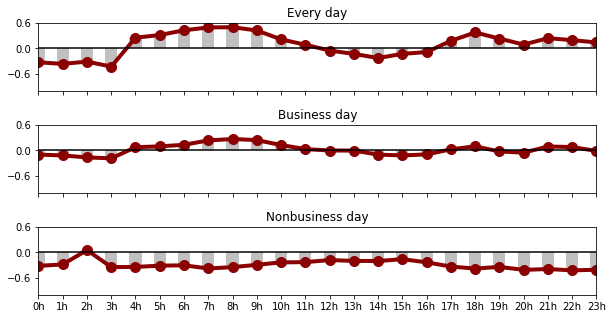

In [145]:
fig2, axes = plt.subplots(3, 1, sharex = True)
corr_jongro['CONTENT']['0h':'23h'].plot(kind = 'bar', figsize = (10, 5), ax = axes[0], title = 'Every day', 
                                                 ylim = [-1,0.6], color = 'silver', yticks = [-0.6, 0.0, 0.6])
corr_jongro['CONTENT']['0h':'23h'].plot(ylim = [-1,0.6], ax = axes[0], color = 'darkred', marker = 'o', 
                                                 linewidth = 4, markersize = 10, yticks = [-0.6, 0.0, 0.6])
axes[0].axhline(0, color='k')
corr_jongro_B['CONTENT']['0h':'23h'].plot(kind = 'bar', figsize = (10, 5), ax = axes[1], title = 'Business day', 
                                                   ylim = [-1,0.6], color = 'silver', yticks = [-0.6, 0.0, 0.6])
corr_jongro_B['CONTENT']['0h':'23h'].plot(ylim = [-1,0.6], ax = axes[1], color = 'darkred', marker = 'o', 
                                                   linewidth = 4, markersize = 10, yticks = [-0.6, 0.0, 0.6])
axes[1].axhline(0, color='k')
corr_jongro_NB['CONTENT']['0h':'23h'].plot(kind = 'bar', figsize = (10, 5), ax = axes[2], title = 'Nonbusiness day', 
                                                    ylim = [-1,0.6], color = 'silver', yticks = [-0.6, 0.0, 0.6])
corr_jongro_NB['CONTENT']['0h':'23h'].plot(ylim = [-1,0.6], ax = axes[2], color = 'darkred', marker = 'o', 
                                                    linewidth = 4, markersize = 10, yticks = [-0.6, 0.0, 0.6])
axes[2].axhline(0, color='k')

plt.subplots_adjust(hspace = 0.5)
plt.savefig("/root/Big_Contest/EDA/JONGRO/img/time_news_jongro.png", dpi = 300)